In [65]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.10.0'

In [66]:
keras.__version__

'2.10.0'

## Download the Data

For this example we will work with the "Fashin MNIST" dataset, composed of thousands of $28 \times 28$ images.

In [67]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [68]:
X_train_full.shape

(60000, 28, 28)

In [69]:
X_test.shape

(10000, 28, 28)

Let's visualize the first image of our training set, so we have a better idea of how the data looks like. 

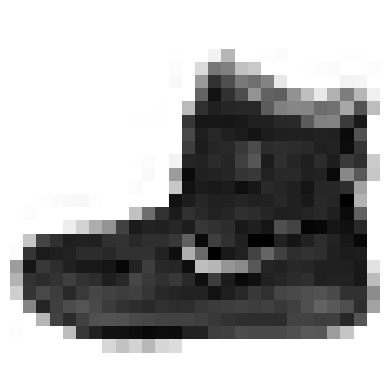

In [70]:
import matplotlib as mlp
import matplotlib.pyplot as plt

sample_image = X_train_full[0]

plt.imshow(sample_image, cmap="binary")
plt.axis("off")
plt.show()

## Define Trainining and Validation Sets

Now let's scale the data by dividing by the maximum value (255), so all the values are in the $[0, 1]$ range.

We will create a validation set from our training set, composed of the first 5000 thousand images, the rest will be used for training.

In [71]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test

In [72]:
print(X_train.shape)
print(X_valid.shape)

(55000, 28, 28)
(5000, 28, 28)


Let's define the names of our classes/categories.

In [73]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", 
               "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [74]:
class_names[y_train_full[0]]

'Ankle boot'

## Scale the Data

In [75]:
import numpy as np

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7

X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train.shape

(55000, 28, 28)

In [76]:
# Include a new dimension with the number of channels

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

X_train.shape

(55000, 28, 28, 1)

## Create the  Model

The input layer has 785 units, which represents the 28 x 28 pixels in the image. Let's define two hidden layers, with 300 and 100 neurons, respecitively. The output layer has 10 units, each representing a class; this output layer uses the `softmax`function to use a multinomial approach to handle multiple classes.

In [77]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax", name="output")
])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 256)        

## Compile the Model

In this step we specify the loss function, optimizers, and metrics for our network. For this example, we are using the categorical crossentroy loss function, since we are dealing with a multiclass categorical target variable. The `sgd` refers to the "Stochastic Gradiend Descent" algorithm, and we will use the accuracy for measuring the performance of our network. 

In [78]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="nadam",
              metrics=["accuracy"])

## Training and Evaluating

To train the network we need to specify the training and validation sets, as well as the number of epochs, callbacks ,and all the necessary parameters.

In [79]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=10, 
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 134s 78ms/step - loss: 0.6878 - accuracy: 0.7619 - val_loss: 0.3782 - val_accuracy: 0.8630
Epoch 2/10
1719/1719 [==============================] - 138s 80ms/step - loss: 0.4148 - accuracy: 0.8603 - val_loss: 0.3290 - val_accuracy: 0.8774
Epoch 3/10
1719/1719 [==============================] - 134s 78ms/step - loss: 0.3591 - accuracy: 0.8792 - val_loss: 0.2895 - val_accuracy: 0.8942
Epoch 4/10
1719/1719 [==============================] - 134s 78ms/step - loss: 0.3259 - accuracy: 0.8883 - val_loss: 0.2707 - val_accuracy: 0.8984
Epoch 5/10
1719/1719 [==============================] - 133s 77ms/step - loss: 0.3038 - accuracy: 0.8974 - val_loss: 0.2874 - val_accuracy: 0.8952
Epoch 6/10
1719/1719 [==============================] - 135s 78ms/step - loss: 0.2832 - accuracy: 0.9027 - val_loss: 0.3003 - val_accuracy: 0.8964
Epoch 7/10
1719/1719 [==============================] - 2487s 1s/step - loss: 0.2738 - accuracy: 0.9060 - val_loss: 0.

With the `epoch` property we get a list with all the epochs that were completed. 

We can use the `history` property to obtain the score and loss of the training and validation sets.

<function matplotlib.pyplot.show(close=None, block=None)>

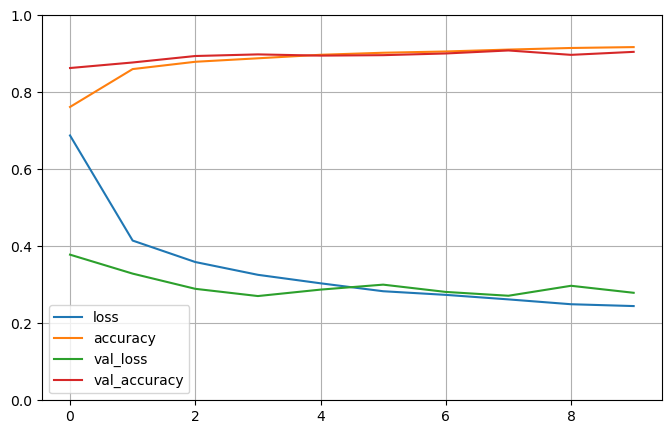

In [82]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show

We use the `evaluate` method to measure the performance of a given data set. Below we display the loss and accuracy of the test set.

Both, the accuracy and the loss are similar to the validation set, which is a sign that we aren't overfitting the training data.

In [83]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 6s 20ms/step - loss: 0.3352 - accuracy: 0.8983


[0.3351931869983673, 0.8982999920845032]

The `predict` method returns the output of a forward step through the network with the given input. For this example, since we are using the `softmax` activation function; we get the probabilities to belong to each class.

In [84]:
X_new = X_test[:5]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 95ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  ]],
      dtype=float32)

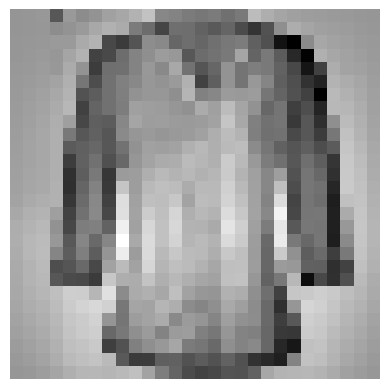

In [98]:
plt.imshow(X_new[4,:], cmap="binary")
plt.axis("off")
plt.show()

Getting the class with the highest probability, we obtain the following.

In [86]:
import numpy as np

y_pred =np.argmax(y_proba, axis=1)
y_pred

array([9, 2, 1, 1, 6])

In [87]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

The results are identical to the actual values. 

In [88]:
y_new = y_test[:5]
y_new

array([9, 2, 1, 1, 6], dtype=uint8)